In [1]:
import numpy as np
import pandas as pd
import random as rn

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

In [200]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [201]:
test_df.columns.values

array(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [202]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [203]:
combine = (train_df, test_df)
combine

(     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name     Sex   Age  SibSp  \
 0                              Braund, Mr. Owen Harris    male  22.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                               Heikkinen, Miss. Laina  female  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                             Allen, Mr. William Henry    male  35.0      0   
 ..                                               

In [204]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [205]:
train_df.isnull().sum()
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [206]:
def bar_chart(feature):
    survived = train_df[train_df['Survived'] == 1][feature].value_counts()
    dead = train_df[train_df['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind = 'bar',stacked = True, figsize = (10,5))

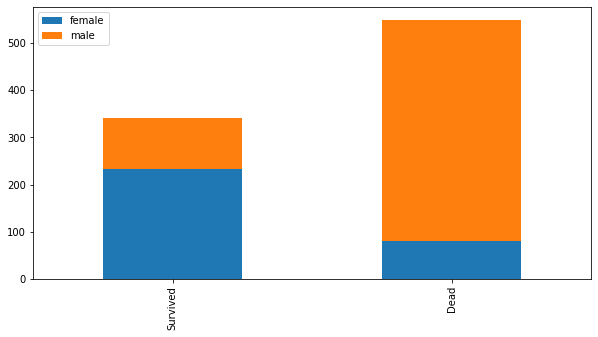

In [207]:
bar_chart('Sex')

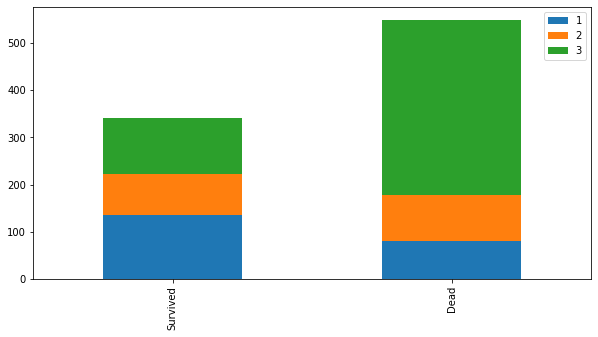

In [208]:
bar_chart('Pclass')

In [209]:
combine = (train_df, test_df)
for dataset in combine:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand =  False)

In [210]:
train_df['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Countess      1
Ms            1
Mme           1
Jonkheer      1
Don           1
Lady          1
Capt          1
Sir           1
Name: Title, dtype: int64

In [211]:
title_mapping = {
    "Mr": 0,
    "Miss": 1,
    "Mrs": 2,
    "Master": 3,
    "Dr": 3,
    "Rev": 3,
    "Col": 3,
    "Major": 3,
    "Mlle": 3,
    "countess": 3, 
    "Ms": 3,
    "Lady": 3,
    "Jonkheer": 3,
    "Don": 3,
    "Dona": 3,
    "Mme": 3,
    "Capt": 3,
    "Sir": 3
}

for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [212]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0


In [213]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


# Name delete from train and test dataset



In [214]:
sex_mapping = {
    "male": 0,
    "female": 1
}

for data in combine:
    data['Sex'] = data['Sex'].map(sex_mapping)

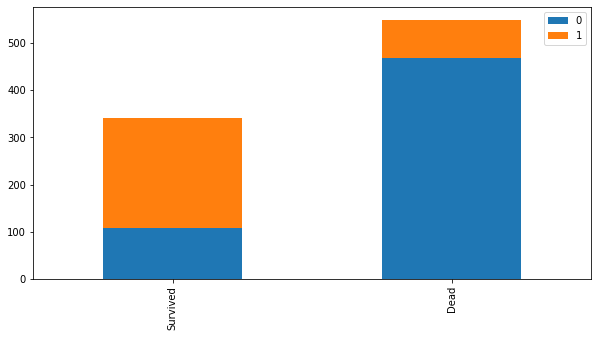

In [215]:
bar_chart('Sex')

In [216]:
train_mean = train_df['Age'].fillna(train_df.Age.mean())
train_df.Age = train_mean
train_df.Age


0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [217]:
train_df["Age"].fillna(train_df.groupby("Title")["Age"].transform("median"), inplace = True)
train_df.Age

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [218]:
test_mean = test_df['Age'].fillna(test_df.Age.mean())
test_df.Age = test_mean
test_df.Age

0      34.50000
1      47.00000
2      62.00000
3      27.00000
4      22.00000
         ...   
413    30.27259
414    39.00000
415    38.50000
416    30.27259
417    30.27259
Name: Age, Length: 418, dtype: float64

In [219]:
for data in combine:
    data.loc[data['Age'] <= 16, 'Age'] = 0,
    data.loc[(data['Age'] > 16) & (data['Age'] <= 26), 'Age'] = 1,
    data.loc[(data['Age'] > 26) & (data['Age'] <= 36), 'Age'] = 2,
    data.loc[(data['Age'] > 36) & (data['Age'] <= 62), 'Age'] = 3, 
    data.loc[data['Age'] > 62, 'Age'] = 4
    

In [220]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,8.0500,NaN,S,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,2.0,0,0,211536,13.0000,NaN,S,3.0
887,888,1,1,"Graham, Miss. Margaret Edith",1,1.0,0,0,112053,30.0000,B42,S,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,2.0,1,2,W./C. 6607,23.4500,NaN,S,1.0
889,890,1,1,"Behr, Mr. Karl Howell",0,1.0,0,0,111369,30.0000,C148,C,0.0


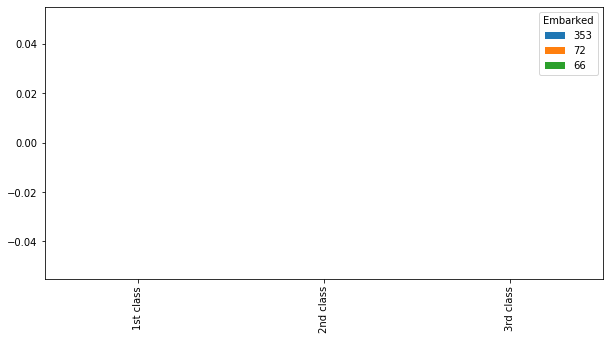

In [221]:
Pclass1 = train_df[train_df['Pclass'] == 1]['Embarked'].value_counts()
Pclass2 = train_df[train_df['Pclass'] == 2]['Embarked'].value_counts()
Pclass3 = train_df[train_df['Pclass'] == 3]['Embarked'].value_counts()

df = pd.DataFrame(Pclass1, Pclass2, Pclass3)
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind = 'bar', stacked = True, figsize = (10,5))

In [222]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,8.0500,NaN,S,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,2.0,0,0,211536,13.0000,NaN,S,3.0
887,888,1,1,"Graham, Miss. Margaret Edith",1,1.0,0,0,112053,30.0000,B42,S,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,2.0,1,2,W./C. 6607,23.4500,NaN,S,1.0
889,890,1,1,"Behr, Mr. Karl Howell",0,1.0,0,0,111369,30.0000,C148,C,0.0


In [223]:
for data in combine:
    data['Embarked'] = data['Embarked'].fillna('S')

In [224]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,8.0500,NaN,S,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,2.0,0,0,211536,13.0000,NaN,S,3.0
887,888,1,1,"Graham, Miss. Margaret Edith",1,1.0,0,0,112053,30.0000,B42,S,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,2.0,1,2,W./C. 6607,23.4500,NaN,S,1.0
889,890,1,1,"Behr, Mr. Karl Howell",0,1.0,0,0,111369,30.0000,C148,C,0.0


In [225]:
embark_mapping = {
    "S": 0,
    "C": 1,
    "Q": 2
}
for data in combine:
    data['Embarked'] = data['Embarked'].map(embark_mapping)

In [226]:
test_fare_mean = test_df['Fare'].fillna(test_df.Fare.mean())
test_df['Fare'] = test_fare_mean


In [227]:
test_df['Fare'].isnull().sum()

0

In [228]:
train_df['Fare'].isnull().sum()

0

In [229]:
train_df['Cabin'].value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
C22 C26        3
F33            3
              ..
C82            1
A36            1
A7             1
B79            1
C32            1
Name: Cabin, Length: 147, dtype: int64

In [230]:
for data in combine:
    data['Cabin'] = data['Cabin'].str[:1]

In [231]:
Pclass1 = train_df[train_df['Pclass'] == 1]['Cabin'].value_counts()
Pclass2 = train_df[train_df['Pclass'] == 2]['Cabin'].value_counts()
Pclass3 = train_df[train_df['Pclass'] == 3]['Cabin'].value_counts()

df = pd.DataFrame(Pclass1, Pclass2, Pclass3)
df

Cabin,5,4,3
Cabin,,,
8,NaN,NaN,NaN
4,NaN,NaN,NaN
4,NaN,NaN,NaN


In [232]:
cabin_mapping = {
    "A": 0,
    "B": 0.4,
    "C": 0.8,
    "D": 1.2,
    "E": 1.6,
    "F": 2.0,
    "G": 2.4,
    "T": 2.8
}

for data in combine:
    data['Cabin'] = data['Cabin'].map(cabin_mapping)

In [233]:
train_cabin_mean = train_df['Cabin'].fillna(train_df.Cabin.mean())
test_cabin_mean = test_df['Cabin'].fillna(test_df.Cabin.mean())

train_df.Cabin = train_cabin_mean
test_df.Cabin = test_cabin_mean

In [234]:
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1



In [235]:
family_mapping = {
    1: 0,
    2: 0.4,
    3: 0.8,
    4: 1.2,
    5: 1.6,
    6: 2.0,
    7: 2.4,
    8: 2.8,
    9: 3.2,
    10: 3.6,
    11: 4.0
}

for data in combine:
    data['FamilySize'] = data['FamilySize'].map(family_mapping)

In [236]:
features_drop = ['Ticket', 'Parch', 'SibSp', 'Name']
train_df = train_df.drop(features_drop, axis = 1)
test_df = test_df.drop(features_drop, axis = 1)



In [237]:
train_df = train_df.drop(['PassengerId'], axis = 1)


In [259]:
train_data = train_df.drop(['Survived'], axis = 1)
target = train_df['Survived']

train_title_mean = train_data['Title'].fillna(train_data.Title.mean()) 
train_data.Title = train_title_mean
train_data

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,7.2500,0.956863,0,0.0,0.4
1,1,1,3.0,71.2833,0.800000,1,2.0,0.4
2,3,1,1.0,7.9250,0.956863,0,1.0,0.0
3,1,1,2.0,53.1000,0.800000,0,2.0,0.4
4,3,0,2.0,8.0500,0.956863,0,0.0,0.0
...,...,...,...,...,...,...,...,...
886,2,0,2.0,13.0000,0.956863,0,3.0,0.0
887,1,1,1.0,30.0000,0.400000,0,1.0,0.0
888,3,1,2.0,23.4500,0.956863,0,1.0,1.2
889,1,0,1.0,30.0000,0.800000,1,0.0,0.0


In [311]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits = 10, shuffle = True, random_state = 0)

In [312]:

clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv = k_fold, n_jobs = 1, scoring = scoring)
score

array([0.72222222, 0.7752809 , 0.80898876, 0.71910112, 0.79775281,
       0.76404494, 0.74157303, 0.75280899, 0.75280899, 0.78651685])

# knn score


In [313]:
round(np.mean(score) * 100, 2)

76.21

In [316]:
svc = SVC()
scoring = 'accuracy'
score = cross_val_score(svc, train_data, target, cv = k_fold, n_jobs = 1, scoring = scoring)
score

array([0.66666667, 0.75280899, 0.69662921, 0.59550562, 0.75280899,
       0.69662921, 0.6741573 , 0.68539326, 0.59550562, 0.62921348])

# SVC score

In [317]:
round(np.mean(score) * 100, 2)

67.45

In [320]:
rn = RandomForestClassifier()
scoring = 'accuracy'
score = cross_val_score(rn, train_data, target, cv = k_fold, n_jobs = 1, scoring = scoring)
score

array([0.75555556, 0.83146067, 0.82022472, 0.78651685, 0.85393258,
       0.79775281, 0.84269663, 0.79775281, 0.74157303, 0.79775281])

# RandomForest Score

In [331]:
round(np.mean(score) * 100, 2)


80.25

In [333]:
rn = RandomForestClassifier()
rn.fit(train_data, target)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [338]:
test_data = test_df.drop("PassengerId", axis = 1).copy()
prediction = rn.predict(test_data)
prediction

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [346]:
submission = pd.DataFrame({
    "PassengerId": test_df['PassengerId'],
    "Survived": prediction
})

submission.to_csv('gender_submission.csv', index = False)

In [347]:
submission = pd.read_csv('gender_submission.csv')
submission.head(30)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0
